In [86]:
# Instalar bibliotecas
!pip install pandas numpy==2.0 ydata-profiling ipywidgets seaborn matplotlib

# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC

# Configuração para gráficos no notebook
%matplotlib inline

In [87]:
# Carregar os dados
df = pd.read_csv("/home/hub/Documents/inteligencia_artificial/clustering_classification/Iris.csv")

# Remover a coluna 'Id'
df = df.drop('Id', axis=1)

In [88]:
# Análise exploratória
print("Informações gerais:")
print(df.info())
print("\nNúmero de valores nulos por coluna:")
print(df.isnull().sum())
print("\nValores únicos na coluna 'Species':")
print(df['Species'].unique())
print(df.shape)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Número de valores nulos por coluna:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Valores únicos na coluna 'Species':
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
(150, 5)


In [89]:
# Relatório automatizado
ProfileReport(df, title="Iris Dataset Information", minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [90]:
# Número de dados nulos
df_null = df.isnull().sum()
df_null

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [91]:
# Valores unicos das espécies
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

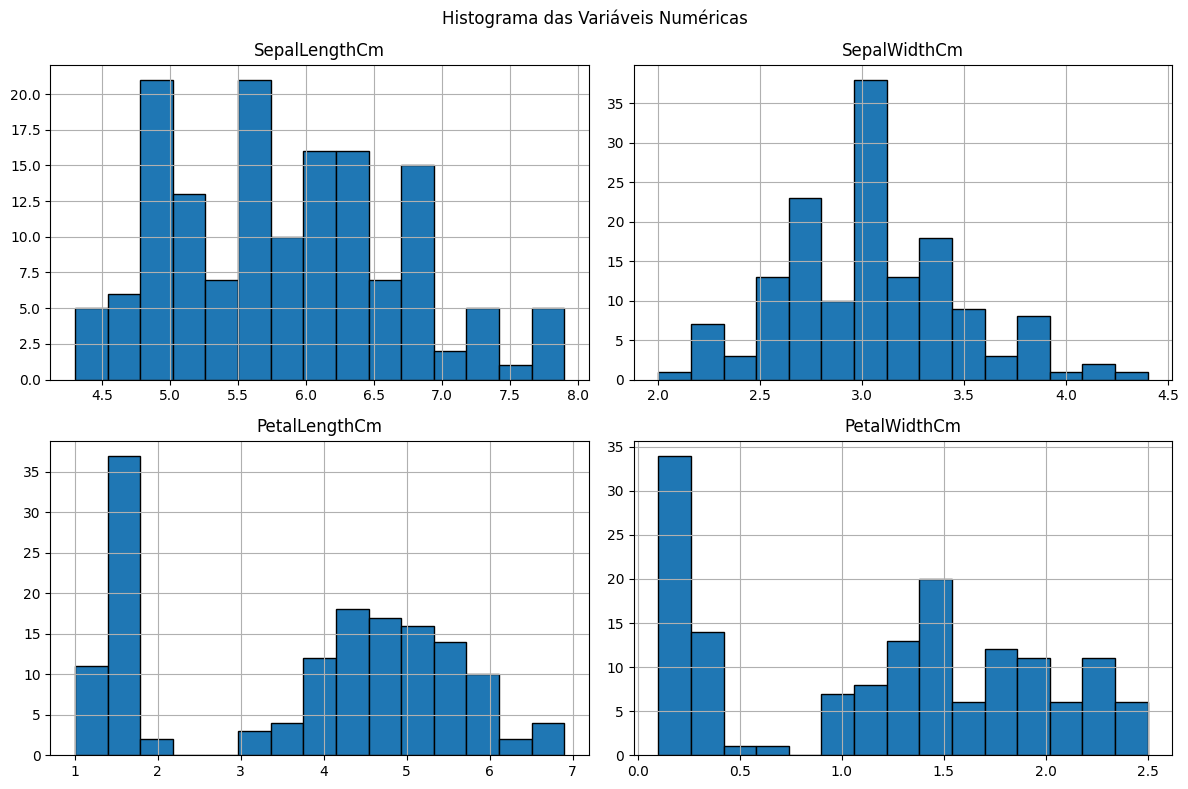

In [92]:
# Histogramas
df.hist(bins=15, figsize=(12, 8), edgecolor='black')
plt.suptitle('Histograma das Variáveis Numéricas')
plt.tight_layout()
plt.show()


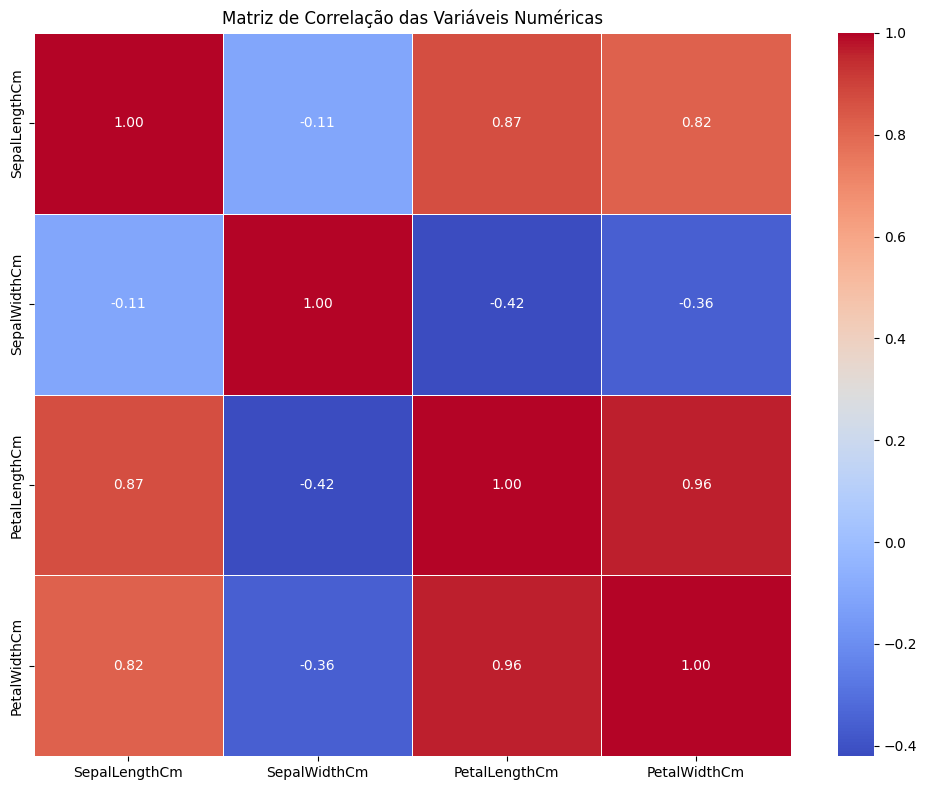

In [93]:
# Matriz de correlação
corr_matrix = df.drop(columns=['Species']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.tight_layout()
plt.show()

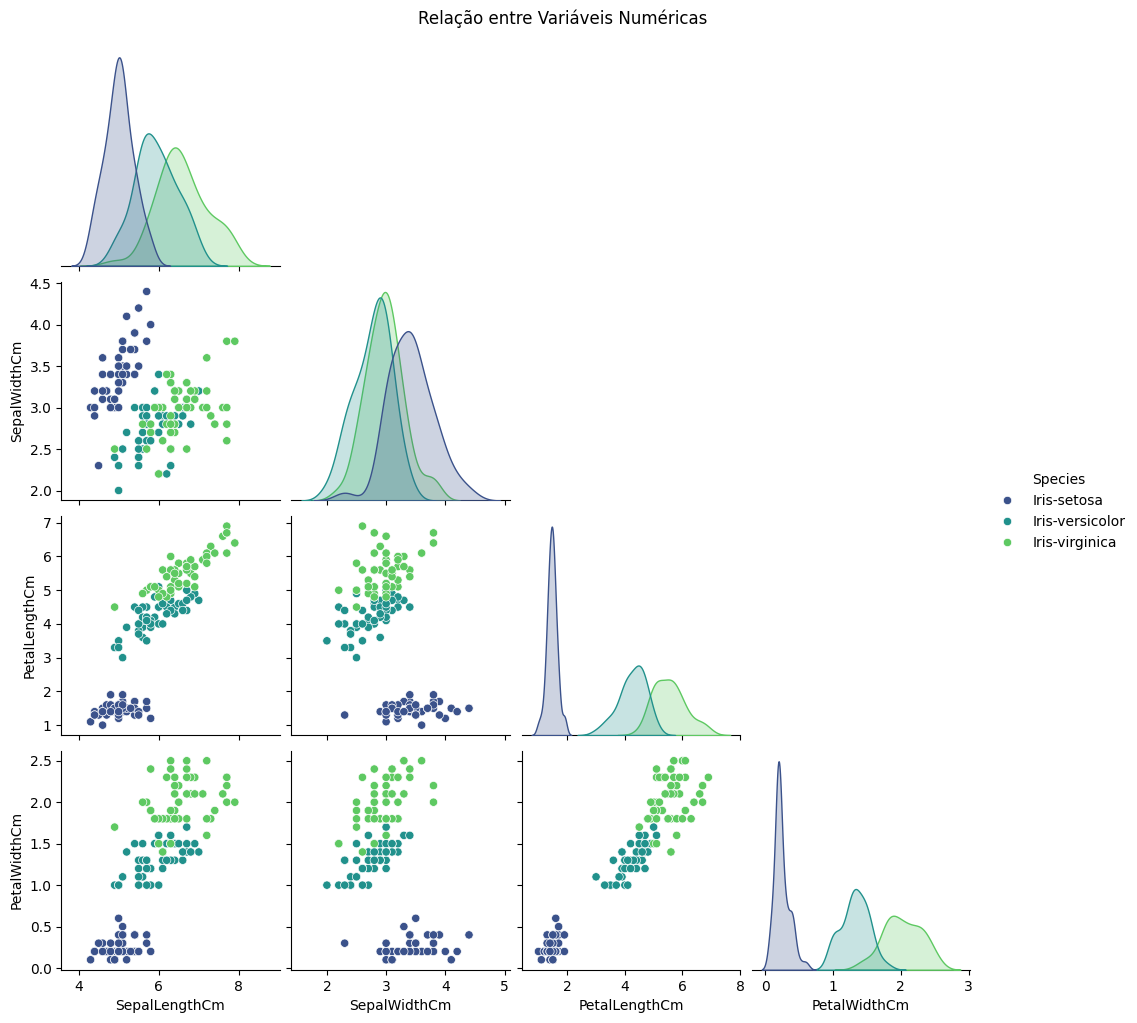

In [94]:
# Gráfico de dispersão
sns.pairplot(df, hue="Species", palette="viridis", diag_kind="kde", corner=True)
plt.suptitle('Relação entre Variáveis Numéricas', y=1.02)
plt.show()

In [95]:
# Separando a variável Species e as variáveis explicativas
X = df.drop('Species', axis=1)
y = df['Species']

from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste 60% treino e 40% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [96]:
param_grid = {
    'max_depth': np.arange(1, 11, 1),  
    # Profundidade de 1 a 10
}

# Árvore de Decisão
tree_model = DecisionTreeClassifier(random_state=42)

# Ajuste de parâmetros
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Treinando o modelo
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_tree_model = grid_search.best_estimator_

# Previsões
y_pred_train = best_tree_model.predict(X_train)
y_pred_test = best_tree_model.predict(X_test)

# Avaliação do modelo
print(f"\nAcurácia no treino: {accuracy_score(y_train, y_pred_train)}")
print(f"Acurácia no teste: {accuracy_score(y_test, y_pred_test)}")

print("\nRelatório de Classificação no Teste:\n", classification_report(y_test, y_pred_test))

# Melhor desempenho e melhores parâmetros
print("Melhor Acurácia (validação cruzada):", grid_search.best_score_)
print("Melhores Parâmetros Encontrados:", grid_search.best_params_)


Acurácia no treino: 0.9714285714285714
Acurácia no teste: 0.9333333333333333

Relatório de Classificação no Teste:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      0.92      0.89        13
 Iris-virginica       0.94      0.89      0.92        19

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45

Melhor Acurácia (validação cruzada): 0.9714285714285715
Melhores Parâmetros Encontrados: {'max_depth': np.int64(2)}


In [97]:
# Criando o modelo SVM
svm_model = SVC(kernel='rbf', random_state=42)

# Treinando o modelo
svm_model.fit(X_train, y_train)

# Realizando previsões
y_pred_svm = svm_model.predict(X_test)

# Avaliação do modelo
print("Acurácia do modelo SVM:", accuracy_score(y_test, y_pred_svm))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_svm))

Acurácia do modelo SVM: 0.9333333333333333

Relatório de Classificação:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.81      1.00      0.90        13
 Iris-virginica       1.00      0.84      0.91        19

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.95      0.93      0.93        45

